<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Partial Differential Equations - Two Examples

### Modules - Partial Differential Equations
<section class="post-meta">
By Henning G. Hugdal, Håkon W. Ånes and Jon Andreas Støvneng  
</section>
Last edited: February 7th 2018 
___

In this module we will look at partial differential equations (PDEs), i.e. differential equations which have derivatives with respect to more than one variable. In physics one stumbles upon many differential equations, two examples being

- the 2-dimensional Laplace equation
    $$ \left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\right)u = 0,$$
    
- and the 1-dimensional heat equation
    $$ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2u}{\partial x^2}.$$

As an introduction to the discretization of partial differential equations, we will in this module give a couple of examples on how to discretize the above equations. This is known as finite-difference methods. There exists many discretization schemes, each having their own strenghts and weaknesses.

First of all, it should be said that much of the difficulty of discretizing partial differential equation comes from the fact that the physics of the problem comes much more into play. For instance when discretizing equations describing fluid transport, the discretization has to be done in a way that uses the relevant information regarding the direction of flow etc.

## Laplace Equation
The Laplace equation can be discretized simply by using the second order central differences scheme. First we discretize the $x$- and $y$-axis using $x_i = x_{min} + i\Delta x$, $i\in[0,N_x]$, and $y_j = y_{min} + j\Delta y$, $j\in[0,N_y]$, where $\Delta x = (x_{max}-x_{min})/N_x$ and $\Delta y = (y_{max}-y_{min})/N_y$. Using this, we discretize $u$ by $u(x_i, y_j) = u_{i,j}$. This gives for the second derivative with respect to $x$
$$\frac{\partial^2 u}{\partial x^2} \rightarrow \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2},$$
and similarly for the second derivative with respect to $y$,
$$\frac{\partial^2 u}{\partial y^2} \rightarrow \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y^2}.$$ This gives the discretized Laplace equation
$$\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2} +
\frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y^2} = 0.$$

### Simple example
We can try to solve the above equation on the domain $x\in[0,1]$, $y\in[0,1]$, with the following boundary conditions (BCs):

- $u(x,0) = u_a = 5$

- $u(x,1) = u_b(x) = 5(1-\sin(\pi x))$

- $u(0,y) = u_c = 5$

- $\frac{\partial u(x,y)}{\partial x}\Big|_{x=1} = 0$.

The first three of these boundary conditions are Dirichlet BCs which have been used in previous modules. The last is a Neumann BC, which requires special care since it doesn't give information about the value at the boundary directly.
<img src="https://www.numfys.net/media/notebooks/images/mo_pdes1_laplace_grid.png" alt="Grid" style="width:604px">

The above image shows how we can choose to discretize the domain: We do not want to include the points we already know the values of, i.e. the points on the $x$- and $y$-axis, and the points on the line $y=1$. However, we have to include the points on the line $x=1$, since here the value of $u$ is unknown. This means that we have the following discretization of the $x$- and $y$-axis:

- $x_i = (1+i)\Delta x$, with $\Delta x = \frac{1}{N_x+1}$ and $i\in [0, N_x]$.

- $y_j = (1+j)\Delta y$, with $\Delta y = \frac{1}{N_y+2}$ and $j \in [0, N_y]$.

Let us now treat the various boundary cases:

- For $i=0$ we get
    $$\frac{u_{0,j+1} -2u_{0,j} + u_{0,j-1}}{\Delta y^2} + \frac{u_{1,j} -2u_{0,j} + u_c}{\Delta x^2} = 0,$$
    where $u_{-1,j}$ has been replaced by the value at the left boundary, $u_c$.
    
- For $j=0$ we get
    $$\frac{u_{i,1} -2u_{i,0} + u_a}{\Delta y^2} + \frac{u_{i+1,0} -2u_{i,0} + u_{i-1,0}}{\Delta x^2} = 0,$$
    where $u_{i,-1}$ has been replaced by the value at the bottom boundary, $u_a$.
- For $j=N_y$ we get
    $$\frac{u_b(x_i) -2u_{i,N_y} + u_{i,N_y-1}}{\Delta y^2} + \frac{u_{i+1,N_y} -2u_{i,N_y} + u_{i-1,N_y}}{\Delta x^2} = 0,$$
    where $u_{i,N_y+1}$ has been replaced by the function giving the values at the top boundary, $u_b(x_i)$.
-  For $i=N_x$ we get
      $$\frac{u_{N_x,j+1} -2u_{N_x,j} + u_{N_x,j-1}}{\Delta y^2} + \frac{u_{N_x+1,j} -2u_{N_x,j} + u_{N_x-1,j}}{\Delta x^2} = 0.$$
      Here we run into a problem: we don't have a value for $u_{N_x+1,j}$, which is a point outside the domain! However, we can find one using the boundary condition: we discretize the boundary condition,
    $$ \frac{\partial u(x,y)}{\partial x} \rightarrow \frac{u_{i+1,j} - u_{i-1,j}}{2\Delta x},$$
    which gives at the boundary
    $$\frac{u_{N+1,j} - u_{N-1,j}}{2\Delta x} = 0.$$
    Hence we get that $u_{N+1,j} = u_{N-1,j}$, and get the following equation at the right boundary:
    $$\frac{u_{N_x,j+1} -2u_{N_x,j} + u_{N_x,j-1}}{\Delta y^2} + \frac{-2u_{N_x,j} + 2u_{N_x-1,j}}{\Delta x^2} = 0.$$
    Notice that we get a factor $2$ in front of $u_{N_x-1,j}$.

In the above, all constants will be moved to the right hand side, and hence make up the vector ${\bf{b}}$ in the matrix equation
$$A{\bf{u}} = {\bf{b}}.$$
It is also important to note, that in the corners of the domain, i.e. at the points $(i,j) = (0,0)$, $(N_y,0)$, $(0,N_x)$ and $(N_y,N_x)$ we must combine two of the above boundary conditions.

We can now start constructing the matrix equation using the above results. For simplicity we will set $\Delta x = \Delta y$, which allows us to multiply them out. We then get
$$\left(\matrix{
-4 & 1 & 0 &0 &...& 0 & 1 & 0 &0&...\\
1 & -4 & 1  &0&...& 0 & 0 & 1 &0&...\\
0& 1 & -4& 1& ...& 0 &0&0&1&...\\
\vdots& \vdots& \vdots& \vdots& \vdots& \vdots &\vdots&\vdots&\vdots&\ddots&
}\right)
\left(\matrix{
u_{0,0}\\
u_{1,0}\\
u_{2,0}\\
\vdots\\
u_{N_x,0}\\
u_{0,1}\\
u_{1,1}\\
u_{1,2}\\
\vdots
}\right) = \left(\matrix{
-u_c-u_a\\
-u_a\\
-u_a\\ \vdots}\right)$$
Here A is a pentadiagonal, $N\times N$-matrix, with $N=N_x\cdot N_y$, and ${\bf b}$ is a vector with length $N$.

We now start solving the above system. First we need to import the necessary packages, and then constuct the matrix $A$ and vector ${\bf b}$. It can be difficult to get all the elements right, and a good tip is to discretize the system using just a few grid points, and then check the implementation using this small grid.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\ffmpeg\\bin'
import numpy.linalg as linalg
import numpy as np

# Set common figure parameters:
newparams = {'figure.figsize': (16, 6), 'font.size': 20}
plt.rcParams.update(newparams)

In [2]:
# Set the number of grid points
Nx = 50
dx = 1/(Nx+1)
x = np.linspace(dx, 1, Nx+1)

dy = dx
Ny = int(1/dy - 2)
N = (Nx+1)*(Ny+1)
y = np.linspace(dy, 1-dx, Ny+1)

# Set constants at boundary
ua = 5
ub = 5*(1-np.sin(np.pi*x))
uc = 5

### Construct the matrix A
A = np.zeros([N,N])

for i in range(N):
    # Set the diagonals to -4
    A[i, i] = -4
    # Set the non-zero off-diagonals to 1
    if i > 0:
        A[i, i-1] = 1
    if i < N-1:
        A[i, i+1] = 1
    if i < N-Nx-1:
        A[i+Nx+1, i] = 1
        A[i, i+Nx+1] = 1
    
for i in range(N):
    # Some elements must be changed to 2 due to the Neumann BCs
    if (i+1)%(Nx+1) == 0:
        A[i,i-1] = 2
    
    # In addition some elements must be set to zero, since
    # the elements are taken care of by terms in b
    if i > 0 and i < N - 1 and (i+1)%(Nx+1) == 0:
        A[i, i+1] = 0
        A[i+1, i] = 0

### Construct the right hand side vector b:
b = np.zeros(N)

# For j = 0, set elements to -ua
b[0:Nx+1] = - ua

# For i = 0, set the elements to -uc
indices = np.mod(range(N),Nx+1) == 0
b[indices] += -uc

# For j = Ny, set elements to -ub(x_i)
for i in range(Nx+1):
    b[N-Nx-1+i] += -ub[i]

Finally, we solve the matrix equation using ``linalg.solve()``, and plot the result.

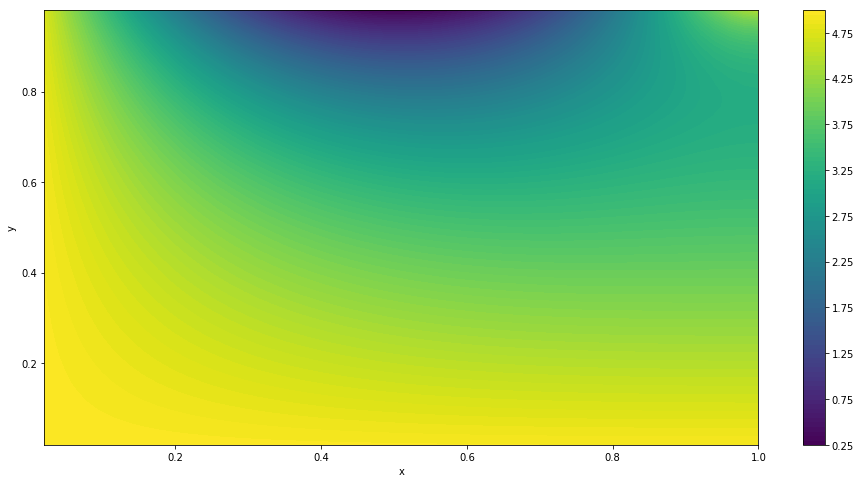

In [3]:
# Solve the system using linalg
u = linalg.solve(A,b)

# Reshape solution array to be able to plot it
u_ = u.reshape(Ny+1,Nx+1)
plt.figure(figsize=(16, 8))
plt.contourf(x, y, u_, 100)
plt.colorbar()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Heat equation
The 1D heat equation is a little bit more tricky to discretize. For the spatial discretization, we again use the second order central differences scheme, resulting in the semi-discretized equation
$$\frac{d}{d t}u(x_i,t) = \alpha \frac{u(x_{i+1},t) - 2u(x_i,t) + u(x_{i+1},t)}{\Delta x^2}.$$
The problem is how to discretize the time-derivative. One guess might be to use the simple explicit Euler method, but this turns out to be unconditionally unstable! Therefore, we try the implicit, or forward, Euler method. This results in the equation
$$ \frac{u_i^{n+1} - u_i^n}{\Delta t} = \alpha \frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i+1}^{n+1}}{\Delta x^2},$$
where we have discretized the time $t$ by $t_n = t_{start} + n\Delta t$, and the superscript in $u$ denotes the time step.
Since one uses forward Euler in time and central differences in space, this is often called the Forward-Time Centered-Space (FTCS) scheme.

We can rearrange the above equation to express the unknown values in terms of the known quantities:
$$ u_i^{n+1}(1+2C) - C(u_{i+1}^{n+1} + u_{i-1}^{n+1}) = u_i^n,$$
where we have defined $C \equiv \alpha\Delta t/\Delta x^2$. This means that we again have to solve a linear system of equations.
From the above we see that, in addition to boundary conditions for $u$, we also need an initial condition for $u$ at time $t=t_{start}$ corresponding to $u_i^0$.

It is important to note that the above method is numerically stable if and only if $|C|\leq 0.5$. Hence we have to check that we choose the number of grid points and time stepts such that this condition is fulfilled.

### Simple Example

We will solve the 1D heat equation using the initial condition
$$u(t=0) = 5\cos(\pi x)$$
and the boundary conditions $u(x=0) = 2$ and $u(x=1) = 10$. We choose $\alpha = 0.005$, and solve the heat equation from $t=0$ to $t=10$.


In [4]:
alpha = 0.005
Nx = 100
dx = 1/Nx
x = np.linspace(0, 1, Nx + 1)

Nt = 1000
dt = 10/Nt

# Boundary condition
ua = 2
ub = 10

C = alpha*dt/dx**2
print("C = ", C)

### Construct solution matrix
A = np.zeros([Nx + 1, Nx + 1])

# Diagonals equal 1+2C
for i in range(Nx + 1):
    A[i, i] = 1 + 2*C

# Off-diagonals equal -C
    if i > 0:
        A[i, i - 1] = -C
    if i < Nx:
        A[i, i + 1] = -C

# Construct boundary condition matrix b where only first and last term are non-zero:
b = np.zeros(Nx + 1)
b[0] = C*ua
b[-1] = C*ub

C =  0.5


We now iterate over time, and solve the system of equations for each time-step. We plot the solution at regular time-intervals.

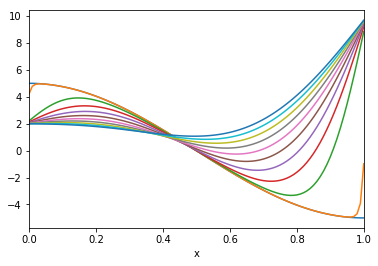

In [5]:
# Intitial condition
u = np.zeros([Nt+1, Nx+1])
u[0,:] = 5*np.cos(np.pi*x)

plt.figure()
plt.plot(x, u[0])

for n in range(Nt):
    u[n+1] = linalg.solve(A, b+u[n])
    
    if n%100 == 0:
        plt.plot(x, u[n+1])
plt.xlabel('x')
plt.xlim([0, 1])
plt.show()

In order to visualize the time-evolution of the system better, we can make an animation. The following code defines functions which allows us to make and display animations.

NB: The animation may not work in all browsers.

In [8]:
from matplotlib import animation
from IPython.display import HTML

# Set new figure parameters
newparams = {'axes.labelsize': 11, 'axes.linewidth': 0.5, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (3, 2),
             'ytick.labelsize': 5, 'xtick.labelsize': 5,}
plt.rcParams.update(newparams);

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-6, 10))
line, = ax.plot([], [], lw=1)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function which updates figure data.  This is called sequentially
def animate(i):
    line.set_data(x, u[i,:])
    return line,

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=20, blit=True)

plt.close(anim._fig)

# Call our new function to display the animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

We see that the solution evolves towards the expected solution - a straight line starting in 2 at $x=0$ and ending in 10 at $x=1$.

### References
[1] R.H. Pletcher, J. C. Tannehill, D. Anderson. *Computational Fluid Mechanics and Heat Transfer*, CRC Press (2011)